In [18]:
import pandas as pd
import yfinance as yf
import cufflinks as cf

def compute_drawdowns(dataframe):
    '''
    Function to compute drawdowns of a timeseries
    given a dataframe of prices
    '''
    return (dataframe / dataframe.cummax() -1) * 100

dimensions=(990, 500)

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

In [3]:
%%capture
SP_1 = yf.download("^GSPC", start="2008-09-20", end="2009-09-19")[['Close']]
SP_2 = yf.download("^GSPC", start="2020-02-19")[['Close']]
SP_3 = yf.download("^GSPC", start="1987-10-05", end="1988-10-05")[['Close']]

In [4]:
SP_1.reset_index(inplace=True)
SP_2.reset_index(inplace=True)
SP_3.reset_index(inplace=True)

In [5]:
SP_1 = SP_1[['Close']]
SP_2 = SP_2[['Close']]
SP_3 = SP_3[['Close']]

In [6]:
SP = SP_1.merge(SP_2, how='left', left_index=True, right_index=True)
SP = SP.merge(SP_3, how='left', left_index=True, right_index=True)

In [7]:
SP = (SP/SP.iloc[0]) * 100
SP.columns = ['2008', '2020', '1987']

In [8]:
# Set Today to Today's date
import datetime

# Set datetime
dt = datetime.datetime.now()

# Set Now as now()
Now = dt.strftime("%Y-%m-%d, %H:%M:%S")

print('A última vez que este script foi executado foi em:', Now)

A última vez que este script foi executado foi em: 2020-07-11, 15:25:36


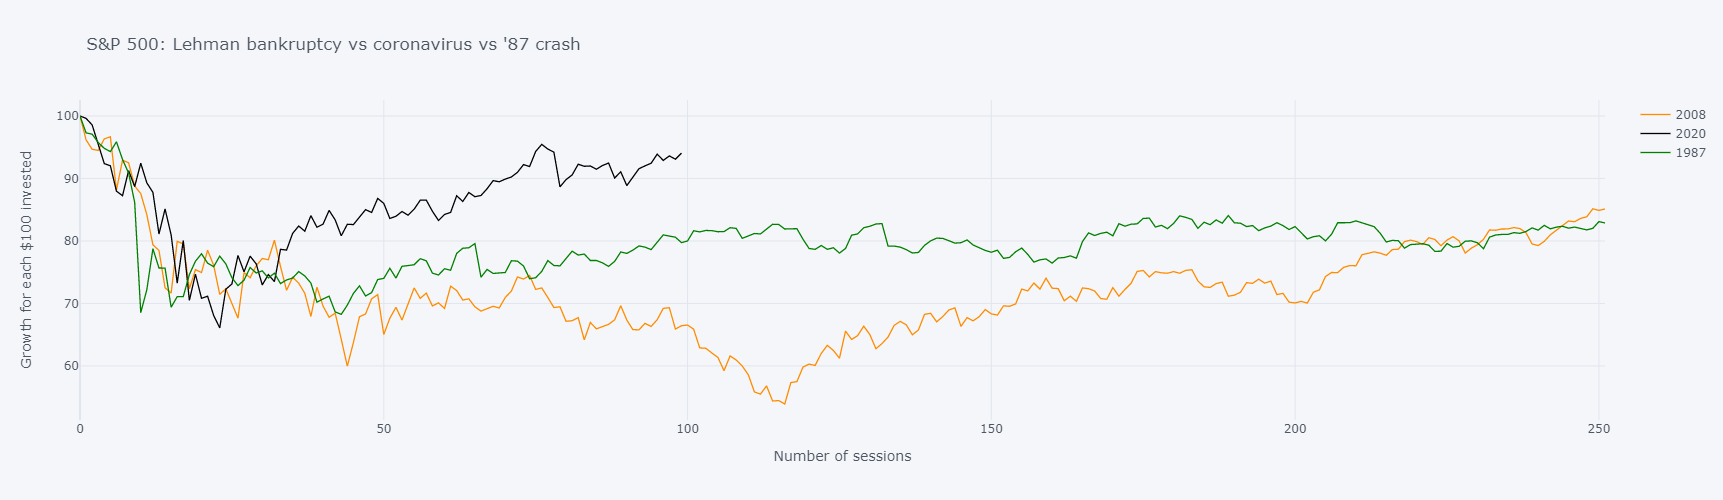

In [9]:
round(SP, 2).iplot(title="S&P 500: Lehman bankruptcy vs coronavirus vs '87 crash",
                   yTitle='Growth for each $100 invested',
                   xTitle='Number of sessions',
                   colors=['darkorange', 'black', 'green'], dimensions=dimensions)

**Notas:** 
- Ao passar o rato por cima do gráfico aparecem opções (no canto superior direito). Opções relevantes são "Show closest data on hoover" ou "Compare data on hoover";
- Se clicarem na legendas o respectivo gráfico desaparece (muito útil para ver apenas 2020 e 2008);
- Podem fazer zoom clicando e arrastando
- '2008' starts at 2008-09-19, '2020' starts at 2020-02-19, and '1987' starts at 1987-10-05

Podem ver em baixo os gráfico individuais com as datas:

In [10]:
# %%capture
# SP_1 = yf.download("^GSPC", start="2008-09-20", end="2009-09-19")[['Close']]
# SP_2 = yf.download("^GSPC", start="2020-02-13")[['Close']]
# SP_3 = yf.download("^GSPC", start="1987-10-05", end="1988-10-05")[['Close']]

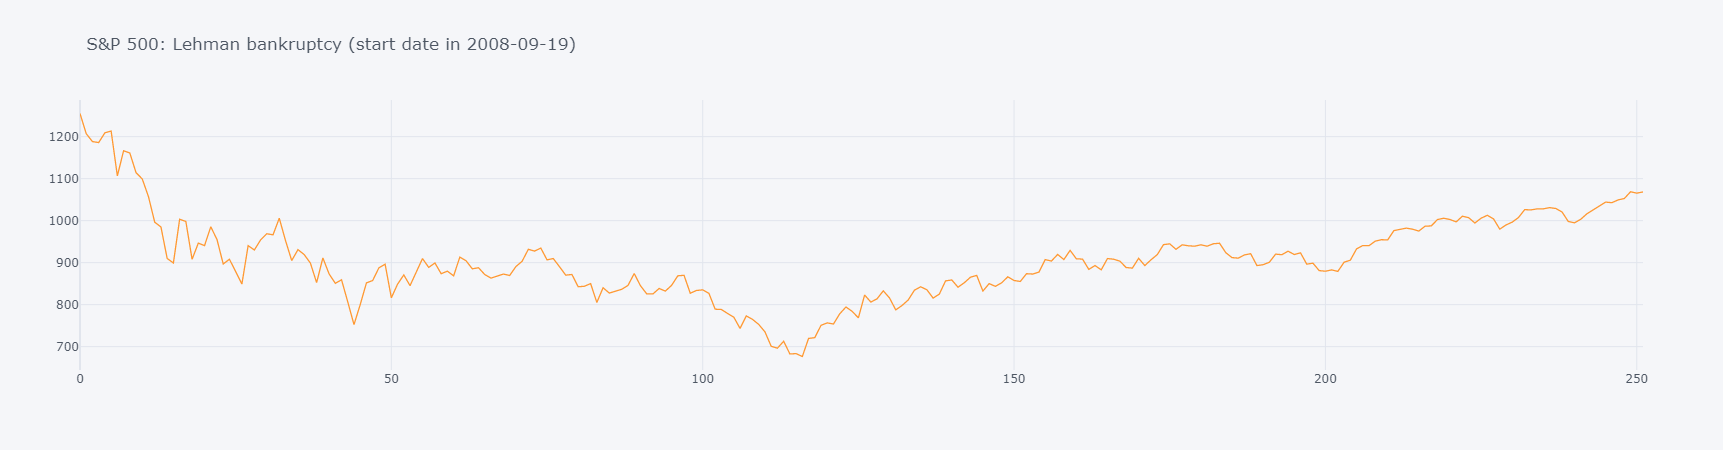

In [11]:
SP_1.iplot(title='S&P 500: Lehman bankruptcy (start date in 2008-09-19)')

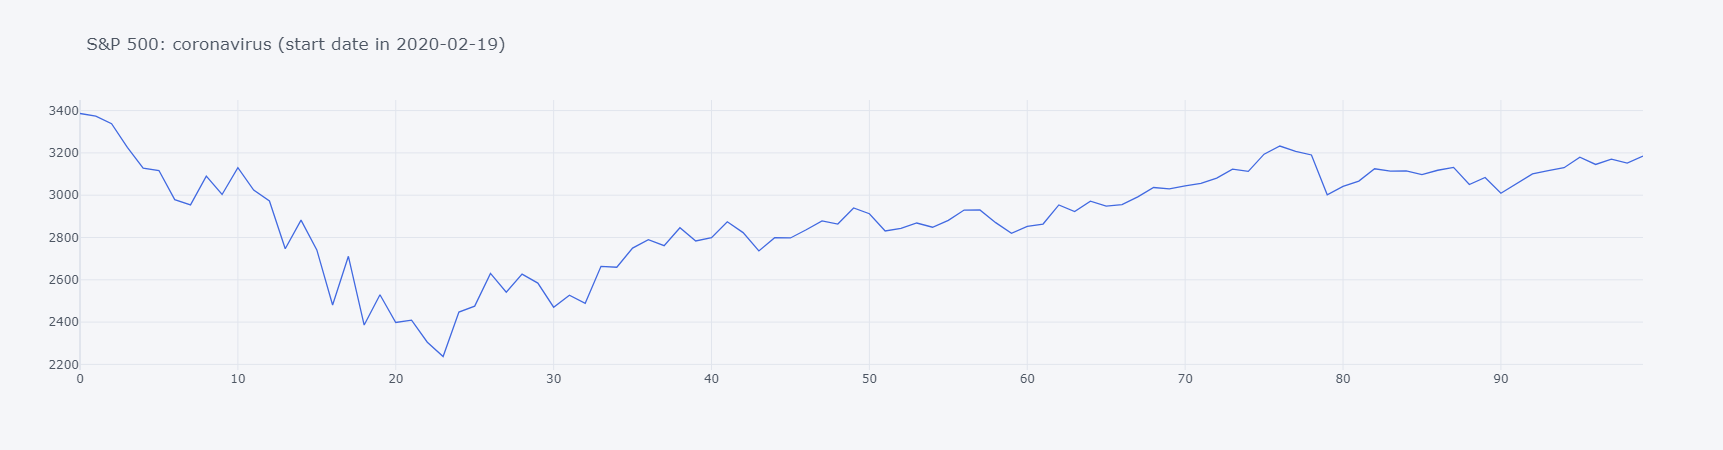

In [12]:
SP_2.iplot(title='S&P 500: coronavirus (start date in 2020-02-19)', color='royalblue')

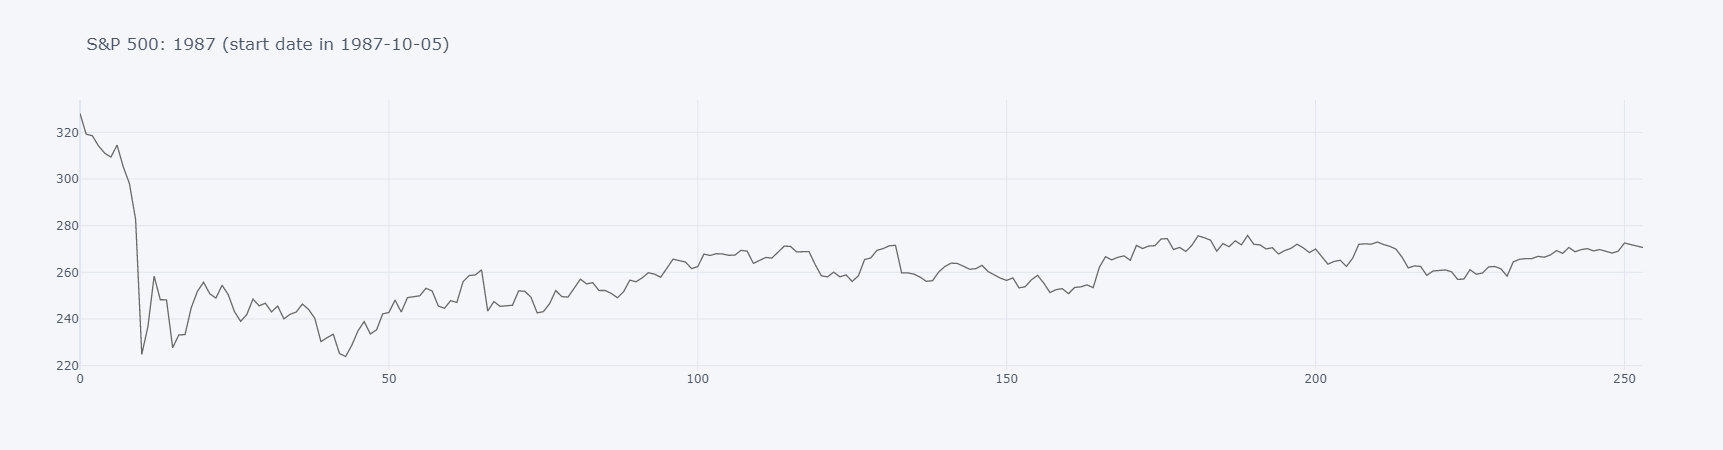

In [13]:
SP_3.iplot(title='S&P 500: 1987 (start date in 1987-10-05)', color='dimgrey')

# Comparação com Dax desde o pico em 19 de Fevereiro

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


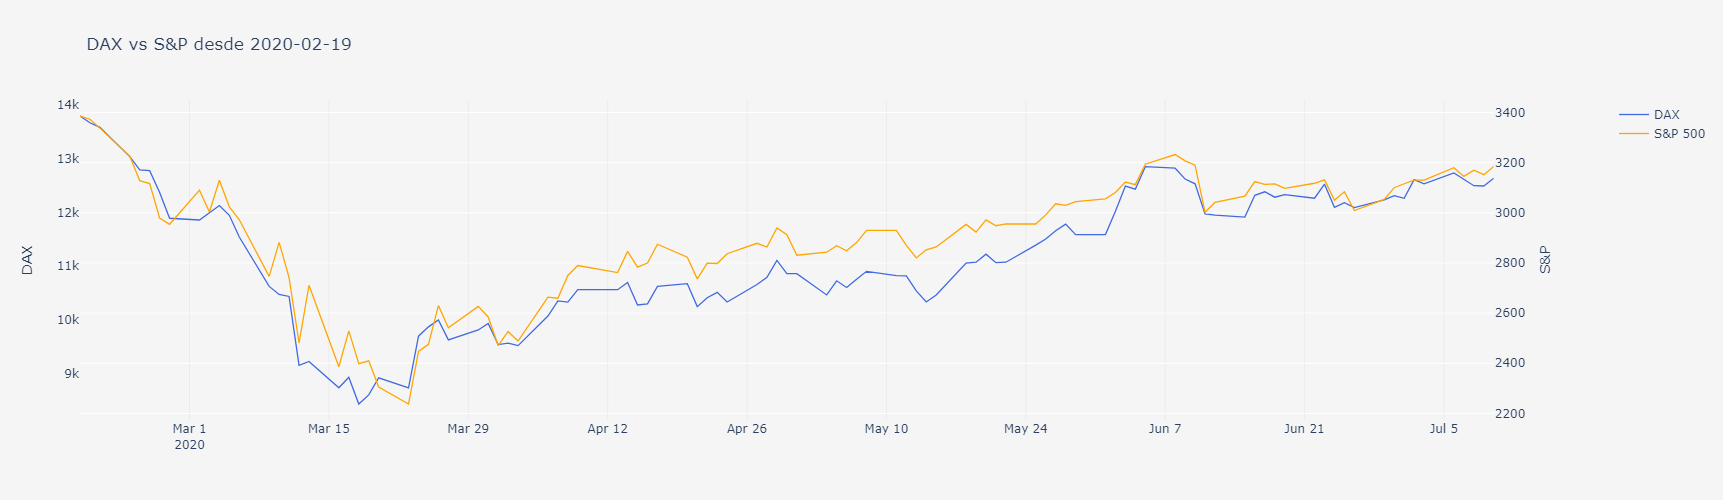

In [14]:
import PortfolioAnalyser as pa

DAX = yf.download("^GDAXI", start="2020-02-19")[['Close']]
SP  = yf.download("^GSPC", start="2020-02-19")[['Close']]

fundos = pa.merge_time_series(DAX, SP, how='outer').ffill()
fundos.columns = ['Dax', 'S&P 500']

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=fundos.index, y=fundos['Dax'], name="DAX", line = dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=fundos.index, y=fundos['S&P 500'], name="S&P 500", line = dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="DAX vs S&P desde 2020-02-19",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
    
    
)

# Set y-axes titles
fig.update_yaxes(title_text="DAX", secondary_y=False)
fig.update_yaxes(title_text="S&P", secondary_y=True)

fig.show()

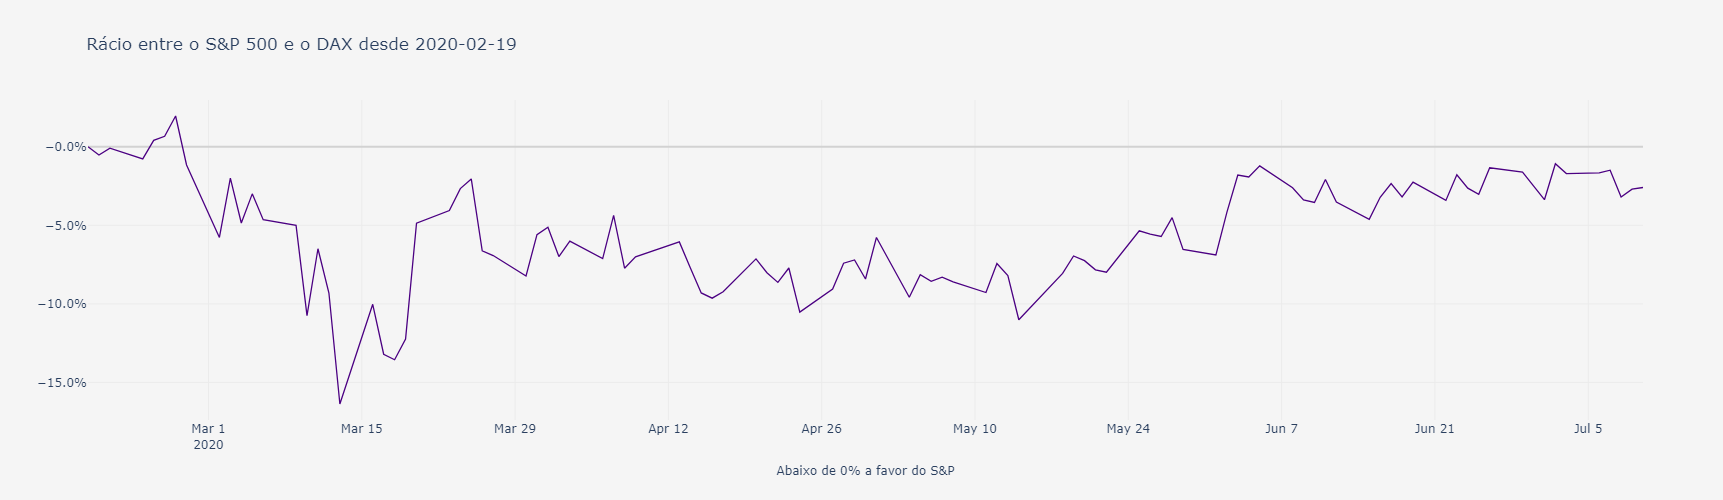

In [15]:
fundos = pa.normalize(fundos)
DD = ((fundos['Dax'] / fundos['S&P 500'])-1)

layout = go.Layout(
    title='Rácio entre o S&P 500 e o DAX desde 2020-02-19',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='Abaixo de 0% a favor do S&P',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD,
    name = '',
    line = dict(
        color = 'indigo',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


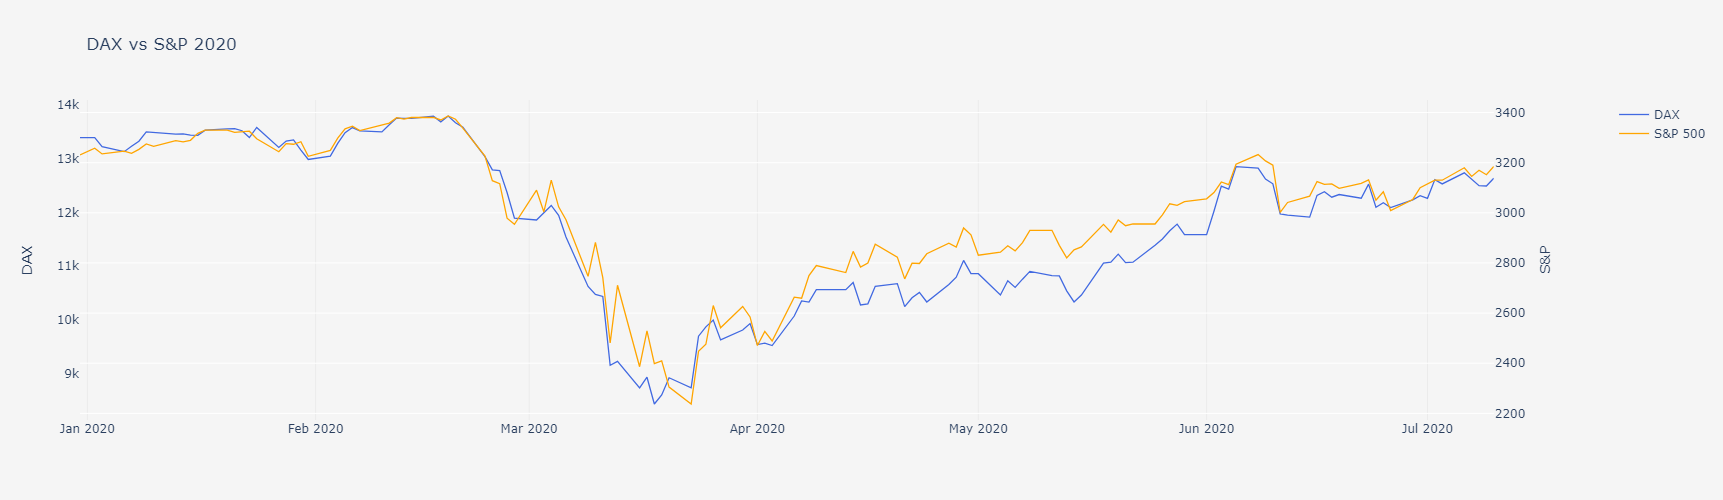

In [16]:
import PortfolioAnalyser as pa

DAX = yf.download("^GDAXI", start="2019-12-31")[['Close']]
SP  = yf.download("^GSPC", start="2019-12-31")[['Close']]

fundos = pa.merge_time_series(DAX, SP, how='outer').ffill().bfill()
fundos.columns = ['Dax', 'S&P 500']

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=fundos.index, y=fundos['Dax'], name="DAX", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=fundos.index, y=fundos['S&P 500'], name="S&P 500", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="DAX vs S&P 2020",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
    
    
)

# Set y-axes titles
fig.update_yaxes(title_text="DAX", secondary_y=False)
fig.update_yaxes(title_text="S&P", secondary_y=True)

fig.show()

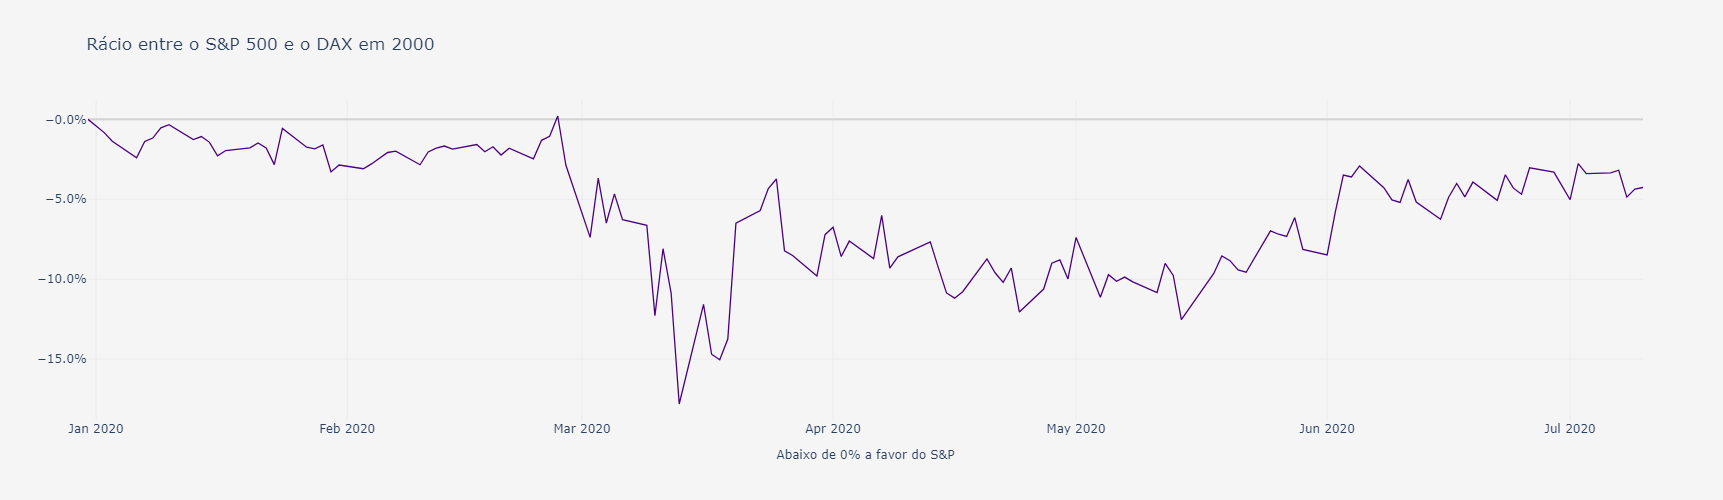

In [17]:
fundos = pa.normalize(fundos)
DD = ((fundos['Dax'] / fundos['S&P 500'])-1)

layout = go.Layout(
    title='Rácio entre o S&P 500 e o DAX em 2000',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='Abaixo de 0% a favor do S&P',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD,
    name = '',
    line = dict(
        color = 'indigo',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

**Disclamer:** Gráficos apenas com efeitos educacionais e de curiosidade intelectual. Não se trata de qualquer aconselhamento para investir ou desinvestir. Para aconselhamento financeiro pode consultar o nosso site e entrar em contacto connosco. Para futurologia aconselhamos o bruxo de Fafe (sem quaisquer garantias ou responsabilidade nossa).